# Modelagem de Projeto com Redes de Petri Coloridas (RPC) (EM ANÁLISE)

Este notebook apresenta a modelagem de um projeto de construção civil com Redes de Petri Coloridas (RPC), incluindo controle de tempo total acumulado. Será usado como base o projeto com as seguintes atividades:

| Código | Descrição                | Precedência      | Duração | Recursos              |
|--------|--------------------------|------------------|---------|------------------------|
| A      | Escavação                | Início           | 2       | Equipamento           |
| B      | Fundação                 | A                | 4       | Pedreiros, Materiais  |
| C      | Paredes                  | B                | 10      | Pedreiros, Blocos     |
| D      | Telhado                  | C                | 6       | Carpinteiros, Telhas  |
| E      | Encanamento Exterior     | C                | 4       | Encanadores           |
| F      | Encanamento Interior     | E                | 5       | Encanadores           |
| G      | Muros                    | D                | 7       | Pedreiros             |
| H      | Pintura Exterior         | E, G             | 9       | Pintores              |
| I      | Instalação Elétrica      | C                | 7       | Eletricistas          |
| J      | Divisórias               | F, I             | 8       | Carpinteiros          |
| K      | Piso                     | J                | 4       | Pisos                 |
| L      | Pintura Interior         | J                | 5       | Pintores              |
| M      | Acabamento Exterior      | H                | 2       | Diversos              |
| N      | Acabamento Interior      | K, L             | 6       | Diversos              |
| FIM    | Finalização do Projeto   | M, N             | 1       | Diversos              |


## Etapas no CPNIDE / CPN Tools

### 1. **Definição dos Tipos de Dados (colsets)**

Copie o trecho abaixo no painel de declaração do CPN IDE:

```
colset ATIVIDADE = with A|B|C|D|E|F|G|H|I|J|K|L|M|N|FIM;
colset RECURSO = with PEDREIRO|CARPINTEIRO|ENCANADOR|ELETRICISTA|PINTOR|EQUIPAMENTO|DIVERSOS|MATERIAL|BLOCOS|TELHAS|PISOS;
colset TEMPO = int;
colset ESTADO = with PENDENTE|EXECUTANDO|CONCLUIDA;

colset TAREFA = product ATIVIDADE * ESTADO * TEMPO;
colset ALOCADO = product RECURSO * ATIVIDADE;
```

### 2. **Criar Lugares (Places)**

- `Tarefas_Pendentes : TAREFA`
- `Tarefas_Executando : TAREFA`
- `Tarefas_Concluidas : TAREFA`
- `Recursos_Disponiveis : RECURSO`
- `Recursos_Alocados : ALOCADO`
- `Tempo_Projeto : TEMPO`
- Um lugar auxiliar `Pre_X_OK` para cada atividade X que precisa de predecessores


## Diagrama Exemplo (Parcial com A e B)
> Representação gráfica simplificada para exemplificar uma parte do modelo.

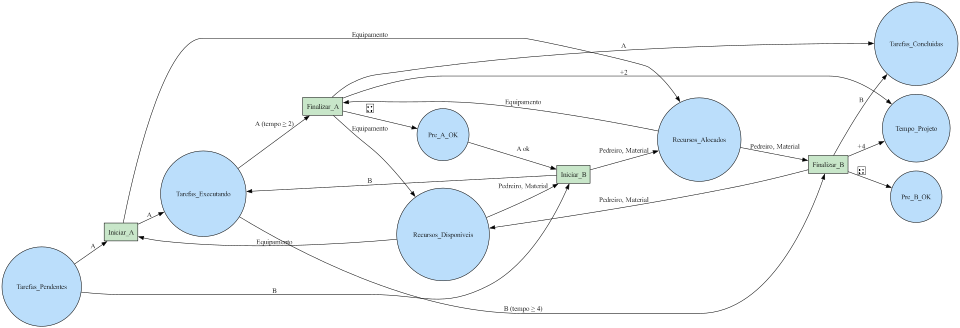

In [1]:

from graphviz import Digraph
from IPython.display import Image

dot = Digraph('RPC_Completa', format='png')
dot.attr(rankdir='LR', size='10')

place_style = {'shape': 'circle', 'style': 'filled', 'fillcolor': '#BBDEFB'}
trans_style = {'shape': 'box', 'style': 'filled', 'fillcolor': '#C8E6C9'}

lugares = ['Tarefas_Pendentes', 'Tarefas_Executando', 'Tarefas_Concluidas',
           'Recursos_Disponiveis', 'Recursos_Alocados', 'Tempo_Projeto',
           'Pre_A_OK', 'Pre_B_OK']
for l in lugares:
    dot.node(l, **place_style)

transicoes = ['Iniciar_A', 'Finalizar_A', 'Iniciar_B', 'Finalizar_B']
for t in transicoes:
    dot.node(t, label=t, **trans_style)

# A
dot.edge('Tarefas_Pendentes', 'Iniciar_A', label='A')
dot.edge('Recursos_Disponiveis', 'Iniciar_A', label='Equipamento')
dot.edge('Iniciar_A', 'Tarefas_Executando', label='A')
dot.edge('Iniciar_A', 'Recursos_Alocados', label='Equipamento')

dot.edge('Tarefas_Executando', 'Finalizar_A', label='A (tempo ≥ 2)')
dot.edge('Recursos_Alocados', 'Finalizar_A', label='Equipamento')
dot.edge('Finalizar_A', 'Tarefas_Concluidas', label='A')
dot.edge('Finalizar_A', 'Recursos_Disponiveis', label='Equipamento')
dot.edge('Finalizar_A', 'Pre_A_OK', label='✓')
dot.edge('Finalizar_A', 'Tempo_Projeto', label='+2')

# B
dot.edge('Tarefas_Pendentes', 'Iniciar_B', label='B')
dot.edge('Pre_A_OK', 'Iniciar_B', label='A ok')
dot.edge('Recursos_Disponiveis', 'Iniciar_B', label='Pedreiro, Material')
dot.edge('Iniciar_B', 'Tarefas_Executando', label='B')
dot.edge('Iniciar_B', 'Recursos_Alocados', label='Pedreiro, Material')

dot.edge('Tarefas_Executando', 'Finalizar_B', label='B (tempo ≥ 4)')
dot.edge('Recursos_Alocados', 'Finalizar_B', label='Pedreiro, Material')
dot.edge('Finalizar_B', 'Tarefas_Concluidas', label='B')
dot.edge('Finalizar_B', 'Recursos_Disponiveis', label='Pedreiro, Material')
dot.edge('Finalizar_B', 'Pre_B_OK', label='✓')
dot.edge('Finalizar_B', 'Tempo_Projeto', label='+4')

# Renderizar
output_path = '/mnt/data/rpc_completa_parcial'
dot.render(output_path, format='png', cleanup=True)
Image(filename=output_path + '.png')
